<a href="https://colab.research.google.com/github/diamondmangrum/UQ-Bio2022/blob/main/Module_2_1_B_Summary_Statistics_for_Multivariate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide1.png alt="drawing" width="1000"/>

<!-- # Computing summary statistics for multivariate datasets -->

----------
## UQ-Bio Summer School 2022

--------------
```
Author: Huy Vo, Ania Baetica, Michael P. May, Brian Munsky
Contact Info: munsky@colostate.edu

Copyright (c) 2021, 2022 Dr. Brian Munsky. 
Dr. Luis Aguilera, Will Raymond
Colorado State University.
Licensed under MIT License.
```

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide2.png alt="drawing" width="1000"/>

<!-- ------
## Learning Objectives for this Notebook:
-------

After completing this notebook, students should:
* Be able to visualize, plot and explore multivariate data in Python.
* Be able to use Python commands to compute basic statistics from multivariate data.
* Be able to use Python to compute basic statistics for temporal or spatial data. -->



# Preliminary Loading of Python Packages and Data

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import  Image
import glob
import pickle

In [ ]:
#@title This code block sets options for plotting.
sns.set_theme(style="whitegrid", font='Liberation Mono')
sns.set_context("notebook")

In [ ]:
#@title This code block downloads and sets up an example dataset for a stochastic repressilator model. 
#@markdown You should be able
#@markdown to locate the two .csv files in the folder "/content/"
#@markdown from your running Colab session (i.e., click the folder icon to the left). 
import pathlib
try:
  import wget
except ModuleNotFoundError:
  !pip install wget
  import wget

download_dir = pathlib.Path("/tmp")
found_files = list(download_dir.glob('**/repressilator.zip'))
if len(found_files) != 0:
  print(f"File already downloaded and can be found in {found_files[0]}.")
else:
  !mkdir /tmp/mod1 
  wget.download(
      url="https://www.dropbox.com/s/3kf7wenafnstcj9/repressilator.zip?dl=1",
      out=str(download_dir.joinpath("mod1/repressilator.zip"))
  )  
  !unzip /tmp/mod1/repressilator.zip

data_path = pathlib.Path("/content/repressilator")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=478e2b35019d50a327dfc9284d698446817453c99e018ebd8e28526132cf409a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Archive:  /tmp/mod1/repressilator.zip
   creating: repressilator/
  inflating: __MACOSX/._repressilator  
  inflating: repressilator/.DS_Store  
  inflating: __MACOSX/repressilator/._.DS_Store  
  inflating: repressilator/repressilator_at_800.csv  
  inflating: __MACOSX/repressilator/._repressilator_at_800.csv  
  inflating: repressilator/repressilator_time_series.csv  
  inflating: __MACOSX/repressilator/._repressilator_time_series.csv  


In [ ]:
# #@title This code block downloads and sets up an example dataset for some microscopy imaging data for many fields of view but at different focal planes. 
# #@markdown Running this could take a minute or two. When it is done, you should see in the folder "/content/" from your running Colab session (i.e., click the folder icon to the left)

# image_dir = pathlib.Path("/content/images_512")
# found_files = list(image_dir.glob('image*'))
# if len(found_files) != 0:
#   print(f"Images already downloaded.")
# else:
#   !wget -q --recursive -np bitbio.org/images_512/ -P /content/ --accept py, JPG, jpg --reject index*
#   !mv bitbio.org/images_512 .
#   !rm -r bitbio.org/

In [ ]:
# Downloading the images to Colab
drive = pathlib.Path("/content")
found_files = list(drive.glob('**/images.zip'))
if len(found_files) != 0:
  print(f"File already downloaded and can be found in {found_files[0]}.")
else:
  !wget --no-check-certificate 'https://www.dropbox.com/s/39yj2fybi350zec/mpmay.zip?dl=0' -r -A 'uc*' -e robots=off -nd -O 'images.zip'
  !unzip -q images.zip
  !mv /content/mpmay/images_* .
  !rm -r /content/mpmay/

will be placed in the single file you specified.

--2022-06-06 20:14:25--  https://www.dropbox.com/s/39yj2fybi350zec/mpmay.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/39yj2fybi350zec/mpmay.zip [following]
--2022-06-06 20:14:25--  https://www.dropbox.com/s/raw/39yj2fybi350zec/mpmay.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc214b7b669b5a5308f4a79404ac.dl.dropboxusercontent.com/cd/0/inline/Bms4sE16bXBo_fFMjr5HIQWMJWMMPiEK6wBspnPKuZOYxvlY9l502cdqatDRkEoP9XDLCYXjOsVag2gIYzVcp_32WbwV8aXlBe7MsJKzTXVmL0_Ymran__SZ-7esj3Ff5Y9owyz4WNwVkvFVaTIJP1phW-pC1C8W3TjIl1X978LvHQ/file# [following]
--2022-06-06 20:14:25--  https://uc214b7b669b5a5308f4a79404ac.dl.dropboxusercontent.com/cd/0/inline/Bms4sE16bXBo_fFMjr5HIQ

['images_512/image_1011.jpg', 'images_512/image_0626.jpg', 'images_512/image_0368.jpg', 'images_512/image_0206.jpg', 'images_512/image_0613.jpg', 'images_512/image_0732.jpg', 'images_512/image_0176.jpg', 'images_512/image_0401.jpg', 'images_512/image_0947.jpg', 'images_512/image_0571.jpg', 'images_512/image_0178.jpg', 'images_512/image_0847.jpg', 'images_512/image_1074.jpg', 'images_512/image_0449.jpg', 'images_512/image_0103.jpg', 'images_512/image_0814.jpg', 'images_512/image_0391.jpg', 'images_512/image_1141.jpg', 'images_512/image_0948.jpg', 'images_512/image_1033.jpg', 'images_512/image_0124.jpg', 'images_512/image_0462.jpg', 'images_512/image_1289.jpg', 'images_512/image_0289.jpg', 'images_512/image_0892.jpg', 'images_512/image_0922.jpg', 'images_512/image_1139.jpg', 'images_512/image_0632.jpg', 'images_512/image_1145.jpg', 'images_512/image_0104.jpg', 'images_512/image_0095.jpg', 'images_512/image_0564.jpg', 'images_512/image_0848.jpg', 'images_512/image_1170.jpg', 'images_512/i

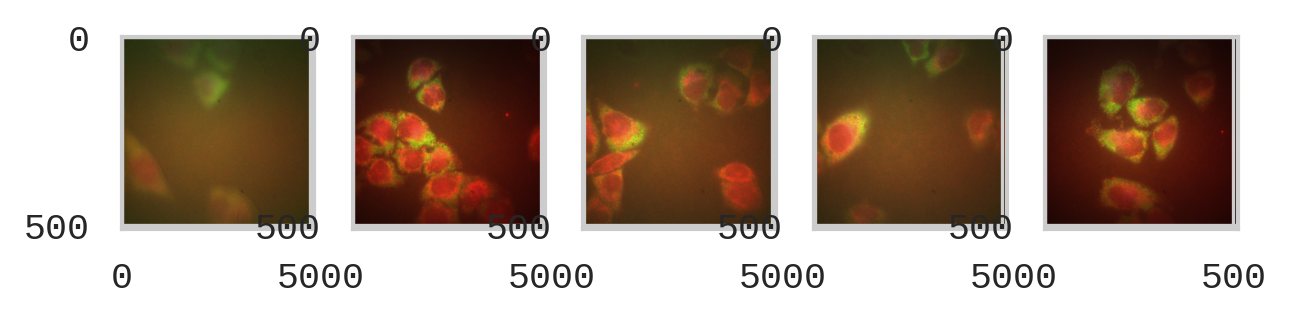

In [ ]:
#@title This code block runs through a few of the loaded images and prints them to the screen.
import glob  # File name globbing utility
from skimage.io import imread # sublibrary from skimage
fig, ax = plt.subplots(1,5,dpi=240)
fullFilePaths = glob.glob('images_512/*.jpg')
fullFilePaths = glob.glob('images_512/*.jpg')

print(fullFilePaths)
for k in range(5):
  img = imread(fullFilePaths[k])
  ax[k].imshow(img[:,:,:]) 

In [ ]:
#@title This codeblock defines a Python Class called __ImageSummaryStatistics__. 
#@markdown This class has a method called "calculate(image)" that operates on an image and returns a dictionary of various summary statistics. 

#@markdown SUMMARY STATISTICS:
#@markdown * __meanRGB__: a length 3 vector containing the mean value of the image intensity in [r,g,b]
#@markdown * __covRGB__: a length 6 vector containing the covariance of pixel intensities: [$\sigma_{rr},\sigma_{rg},\sigma_{rb},\sigma_{gg},\sigma_{gb},\sigma_{bb}$]
#@markdown * __gradientSharpnessRGB__: a length 3 vector containing the sharpness of the image in [r,g,b] measured using a pixel gradient

from PIL import Image
import glob
import pickle
from skimage.filters import difference_of_gaussians

class ImageSummaryStatistics:
    def __init__(self):
        self.sharpness=None

    def calculate(self,image):
        self.fImage=None
        statistics=dict()
        statistics['meanRGB'] = self.getMean(image)
        statistics['covRGB'] = self.getCoVariance(image)
        statistics['filtMoments'] = self.getFiltMoments(image)
        statistics['gradientSharpnessRGB']=self.getGradientSharpness(image)
        return statistics

    def getGradientSharpness(self,image):
        sharpness=np.zeros(3)
        for index in range(3):
            page=image[:,:,index]
            gy, gx = np.gradient(page)
            gnorm = np.sqrt(gx ** 2 + gy ** 2)
            sharpness[index] = np.average(gnorm)
        return sharpness

    def getMean(self,image):
        mean = np.zeros(3)
        for index in range(3):
            page = image[:, :, index]
            mean[index] = np.mean(page)
        return mean

    def getFiltMoments(self,image):
        diff_img  = difference_of_gaussians(image,2.0,multichannel=True)
        Matrix_RGB_Pixels = np.array([np.reshape(diff_img[:,:,i],diff_img.shape[0]*diff_img.shape[1]) for i in range(3)])
        FiltMean = np.mean(Matrix_RGB_Pixels,axis=1)
        cov = np.cov(Matrix_RGB_Pixels)
        return [FiltMean[0],FiltMean[1],FiltMean[2],cov[0,0],cov[0,1],cov[0,2],cov[1,1],cov[1,2],cov[2,2]]

    def getCoVariance(self,image):
        Matrix_RGB_Pixels = np.array([np.reshape(image[:,:,i],image.shape[0]*image.shape[1]) for i in range(3)])
        cov = np.cov(Matrix_RGB_Pixels)
        return [cov[0,0],cov[0,1],cov[0,2],cov[1,1],cov[1,2],cov[2,2]]       

#@markdown After we have defined this class, we run the method on all of the loaded images.
fullFilePaths = glob.glob('images_512/*.jpg')
statistics=dict()
for fullFilePath in fullFilePaths:
    filePathSplitIntoList=fullFilePath.split('_')
    ImageFileStringAndExtenstion=filePathSplitIntoList[2].split('.')
    imageIdAsInteger=int(ImageFileStringAndExtenstion[0])
    image = Image.open(fullFilePath)
    imageAsNumpyArray = np.array(image).astype('int32')
    statisticsCalculator = ImageSummaryStatistics()
    statistics[imageIdAsInteger] = statisticsCalculator.calculate(imageAsNumpyArray)

#@ Define the features and associated target
def StatsAsVector(stats):
  features=np.array([])   
  for k in stats.keys():
    features = np.append(features,np.array(stats[k]))
  return features
  
features = np.array([StatsAsVector(statistics[i]) for i in range(len(statistics))])

targets=[]
for x in np.arange(-1800.,1800.,100):
   for y in np.arange(-1800.,1800.,100):   
       targets.append((x**2.+y**2.)**(0.5))
targets = np.array(targets)

# Mathematical Prelude to Random Vectors

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide3.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide4.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide5.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide6.png alt="drawing" width="1000"/>

# Mathematical details

In the previous notebook, you have learned about random variables, which take scalar values. Random vectors is a natural generalization of this concept into multi-dimensional objects. Formally, a random vector is a tuple of observations $\mathbf{X}:=(X_1, \ldots, X_d)$ whose precise values are _uncertain_. Note that each component $X_1, X_2,\ldots$ is itself a random variable.

For this Summer School, we will only care about random vectors whose components are either all-discrete or all-continuous. When all components of $\mathbf{X}$ are discrete random variables, we define the __joint probability mass function__ of $\mathbf{X}$ as
$$
p_{\mathbf{X}}(k_1, \ldots, k_d) := 
\mathrm{Pr}\left(X_1 = k_1 , X_2 = k_2 , \ldots X_d = k_d \right).
$$

When all components of $\mathbf{X}$ are continuous random variables, we can define the __joint probability density function__ of $\mathbf{X}$ as a function
$$
f_{\mathbf{X}}(x_1,\ldots, x_d) 
$$
such that 
$$
\mathrm{Pr}\left(X_1 \in I_1, X_2 \in I_2 \ldots X_d \in I_d \right)
=
\int_{I_1\times I_2 \times \ldots \times I_d}
{
  f_{\mathbf{X}}(x_1,\ldots, x_d)\mathrm{dx_1dx_2\ldots dx_d}
}.
$$

The __joint cumulative distribution function__ is defined as
$$
F_{\mathbf{X}}(x_1, \ldots, x_d)
=
\mathrm{Pr}\left(X_1\leq x_1, \ldots, X_d \leq x_d \right).
$$

Of course, the component variables $X_1, \ldots, X_d$ are random variables in their own rights and have their own PMFs or PDFs. The PMFs or PDFs of individual components are often refered to as the __marginal__ PMFs (PDFs) and they relate to the whole through integration
$$
f_{X_i}(x_i) = \int_{\mathbb{R}^{d-1}}{f_{\mathbf{X}}(x_1,\ldots, x_i, \ldots,x_d) \mathrm{dx_1\ldots dx_{i-1}dx_{i+1}\ldots dx_d}}.
$$



## Expected value and covariance matrix
We have learned about the expected value and variance of a random variable, and these concepts generalize naturally to random vectors. The expected value (or mean) of a random vector is simply a vector made of the expected values of the component variables, that is,
$$
\mathbb{E}(\mathbf{X})
=
\left(\mathbb{E}(X_1),\ldots, \mathbb{E}(X_d)\right).
$$

The covariance matrix of $\mathbf{X}$, denoted $\mathrm{Cov}(\mathbf{X})$, is a $d\times d$ matrix whose $(i,j)$-th entry is given by
$$
[\mathrm{Cov}(\mathbf{X})]_{i,j}
=
\mathbb{E}\left((X_i - \mathbb{E}X_i)(X_j - \mathbb{E}X_j)\right).
$$
The diagonal entries of the covariance matrix coincide with the variances of the individual components $X_i$. The off-diagonal entry at $(i,j)$ is called the covariance of $X_i$ and $X_j$. If this entry is positive, $X_i$ tends to increase when $X_j$ is increased. If this entry is zero, there is no apparent relationship between $X_i$ and $X_j$.

The Pearson correlation between two variables $X$, $Y$ is defined as
$$
\rho(X,Y) = \frac{\mathrm{Cov}(X,Y)}{\sqrt{\mathrm{Var}(X)}\sqrt{\mathrm{Var}(Y)}}.
$$
The Pearson correlation is used to measure the _linear_ association between two variables. If $\rho$ is close to $1.0$, the joint samples of $X$ and $Y$ will concentrate around a line with positive slope. If $\rho$ is close to $-1$, the joint samples will concentrate around a line with negative slope. Note that the value of $\rho$ has no information about the value of the slope. In addition, if the relationship between $X$ and $Y$ is _nonlinear_, the Pearson correlation will not be informative.


# Visualizing datasets with independent multivariate observations

In [ ]:
data_represillator = pd.read_csv(data_path.joinpath("repressilator_at_800.csv"))
print(data_represillator)

     Cell ID           X           Y           Z
0          0   13.432570   29.686194  293.133496
1          1  344.744825    0.490518   40.873648
2          2   80.539926   38.030598   23.851180
3          3   21.513571   45.277671  269.313246
4          4   11.681497   63.595451  198.603801
..       ...         ...         ...         ...
995      995   20.167060  234.801182   70.872040
996      996   33.687247    0.213848  218.575943
997      997   82.122906   55.799719  108.583873
998      998   24.504783  141.186859  104.944006
999      999  131.529992   46.993861   41.832045

[1000 rows x 4 columns]


In [ ]:
print(data_represillator.columns)

Index(['Cell ID', 'X', 'Y', 'Z'], dtype='object')


## Visualizing multivariate data with scatterplot

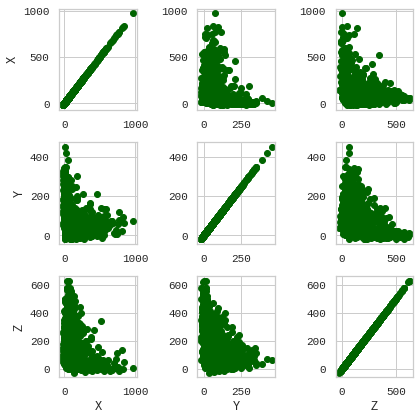

In [ ]:
fig, axs = plt.subplots(3,3)
fig.set_size_inches(6, 6)
fig.set_tight_layout(True)

for i, rfeature in enumerate(['X', 'Y', 'Z']):
  for j, cfeature in enumerate(['X', 'Y', 'Z']): 
    axs[i, j].scatter(data_represillator[cfeature], data_represillator[rfeature], color="darkgreen")
    if i==2: axs[i, j].set_xlabel(cfeature)
    if j==0: axs[i, j].set_ylabel(rfeature)

In [ ]:
Matrix_Repressilator_Data = data_represillator.iloc[:, 1:].to_numpy(copy=True)
print(Matrix_Repressilator_Data)

[[ 13.43257048  29.6861943  293.13349617]
 [344.7448246    0.49051816  40.87364833]
 [ 80.53992552  38.03059791  23.85117972]
 ...
 [ 82.12290613  55.79971871 108.58387325]
 [ 24.50478341 141.1868594  104.94400551]
 [131.52999201  46.9938611   41.83204468]]


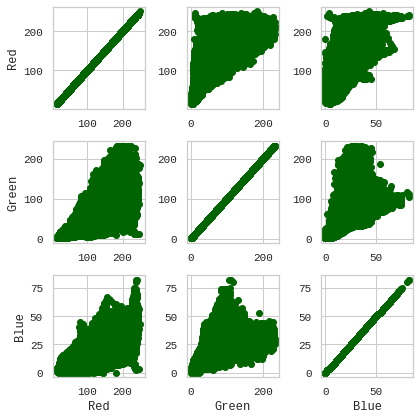

In [ ]:
#@title Visualizing correlations in RGB pixel intensities
img = imread(fullFilePaths[1])

# Reformat the image pixel data in RGB format.
Matrix_RGB_Pixels = np.array([np.reshape(img[:,:,i],img.shape[0]*img.shape[1]) for i in range(3)])

fig, axs = plt.subplots(3,3)
fig.set_size_inches(6, 6)
fig.set_tight_layout(True)

for i, rfeature in enumerate(['Red', 'Green', 'Blue']):
  for j, cfeature in enumerate(['Red', 'Green', 'Blue']): 
    axs[i, j].scatter(Matrix_RGB_Pixels[j,:], Matrix_RGB_Pixels[i,:], color="darkgreen")
    if i==2: axs[i, j].set_xlabel(cfeature)
    if j==0: axs[i, j].set_ylabel(rfeature)

# Computing Sample Statistics

## Means, Variances and CoVariances
The sample mean vector and sample covariance matrix are estimates of the true population mean and covariance, based on the finite samples we have in the data. 

Suppose that the data has been arranged into a matrix 
$$
\mathbf{A} = 
\begin{bmatrix}
\mathbf{x}_1^T \\
\ldots \\
\mathbf{x}_n^T \\
\end{bmatrix}
$$
where each $\mathbf{x}_i$ is a sample. The formula for the sample mean is
$$
\overline{\mathbf{x}}
=
\frac{1}{n}\left(\mathbf{x}_1 + \ldots + \mathbf{x}_n\right)
$$
and for the covariances
$$
[\mathbf{C}]_{i,j}
=
\frac{1}{n-1}\sum_{k=1}^{n}{\left(x_{k,i} - \overline{x}_i\right)\left(x_{k,j} - \overline{x}_j\right)}.
$$
The formula for the sample covariance could be written in a vectorized form as
$$
\mathbf{C}
=
\frac{1}{n-1}\sum_{k=1}^n{(\mathbf{x}_k - \overline{\mathbf{x}})(\mathbf{x}_k - \overline{\mathbf{x}})^T}.
$$

Let's try turning these formulas into our own functions

In [ ]:
def sample_mean(data: np.array) -> np.array:
  """
  Compute the sample mean from a dataset, assuming that each row is an observation and each column is a feature.
  """
  n_features = data.shape[1]
  n_samples = data.shape[0]
  out = np.zeros((n_features,))
  for i in range(n_samples):
    out += data[i, :]
  out /= n_samples
  return out 

def sample_cov(data: np.array) -> np.array:
  """
  Compute the sample covariance matrix from a dataset, assuming that each row is an observation and each column is a feature.
  """
  n_features = data.shape[1]
  n_samples = data.shape[0]
  out = np.zeros((n_features,n_features))
  mean = sample_mean(data)
  for i in range(n_samples):
    out += np.outer(data[i,:] - mean, data[i,:]- mean)
  out /= (n_samples - 1)
  return out 

The library `NumPy` also provides built-in functions that can be used for finding sample mean and covariance.

In [ ]:
Reps_mean_np = np.mean(Matrix_Repressilator_Data , axis=0) # In the repressilator data, variables are in columns (axis=0) 
Reps_cov_np = np.cov(Matrix_Repressilator_Data, rowvar=False) # In the repressilator data, variables are in columns (axis=0) 

In [ ]:
Img_mean_np = np.mean(Matrix_RGB_Pixels , axis=1)  # In the pixel data, variables are in rows (axis=1) 
Img_cov_np = np.cov(Matrix_RGB_Pixels, rowvar=True) # In the pixel data, variables are in rows (axis=1) 

In [ ]:
Reps_mean = sample_mean(Matrix_Repressilator_Data)
Reps_cov = sample_cov(Matrix_Repressilator_Data)

print(f"The difference between NumPy and my function for mean is: {Reps_mean - Reps_mean_np}")
print(f"The difference between NumPy and my function for covariance is: {Reps_cov - Reps_cov_np}")     

The difference between NumPy and my function for mean is: [-1.42108547e-14 -1.42108547e-14  0.00000000e+00]
The difference between NumPy and my function for covariance is: [[-1.81898940e-11  0.00000000e+00 -6.36646291e-12]
 [ 0.00000000e+00  8.18545232e-12  1.81898940e-12]
 [-6.36646291e-12  1.81898940e-12  3.63797881e-12]]


## Pearson correlation

In [ ]:
corr = np.corrcoef(Matrix_Repressilator_Data, rowvar=False)
print(corr)

[[ 1.         -0.24263003 -0.29235243]
 [-0.24263003  1.         -0.43264578]
 [-0.29235243 -0.43264578  1.        ]]


[Text(0, 0.5, 'X'), Text(0, 1.5, 'Y'), Text(0, 2.5, 'Z')]

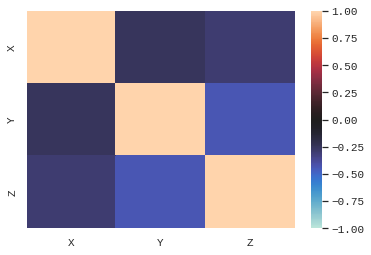

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(1,1)
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, center=0)
ax.set_xticklabels(["X", "Y", "Z"])
ax.set_yticklabels(["X", "Y", "Z"])

[[1.         0.79550638 0.80627968]
 [0.79550638 1.         0.80239804]
 [0.80627968 0.80239804 1.        ]]


[Text(0, 0.5, 'Red'), Text(0, 1.5, 'Green'), Text(0, 2.5, 'Blue')]

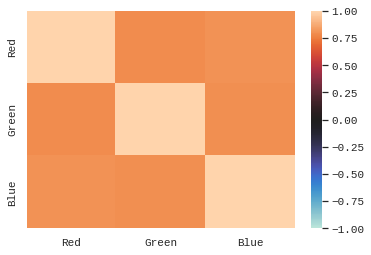

In [ ]:
corr = np.corrcoef(Matrix_RGB_Pixels, rowvar=True) # Note that variables are now in the rows!
print(corr)
fig, ax = plt.subplots(1,1)
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, center=0)
ax.set_xticklabels(["Red", "Green", "Blue"])
ax.set_yticklabels(["Red", "Green", "Blue"])

## Computing marginal histograms

(array([599., 195.,  95.,  41.,  23.,  27.,   8.,   7.,   4.,   1.]),
 array([-23.85467186,  75.89040394, 175.63547973, 275.38055552,
        375.12563131, 474.8707071 , 574.61578289, 674.36085869,
        774.10593448, 873.85101027, 973.59608606]),
 <a list of 10 Patch objects>)

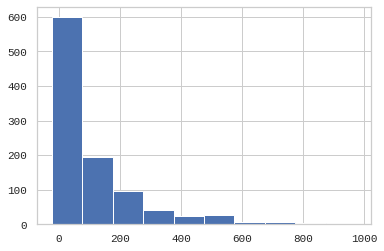

In [ ]:
h, e = np.histogram(Matrix_Repressilator_Data[:, 0], bins=10)
plt.hist(Matrix_Repressilator_Data[:, 0], bins=10)

You don't need to always use uniform bin widths. In fact, you can specify your own custom bins.

(array([ 11.,  57., 182., 334.]),
 array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
        100.        ]),
 <a list of 4 Patch objects>)

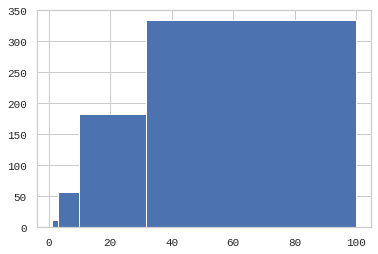

In [ ]:
# bin_edges = [0.0, 1.0, 5.0, 10.0, 100.0, 200.0, 500.0, 1000.0]
bin_edges = np.logspace(0.0, 2.0, 5)
plt.hist(Matrix_Repressilator_Data[:, 0], bins=bin_edges)

Text(0, 0.5, 'Counts')

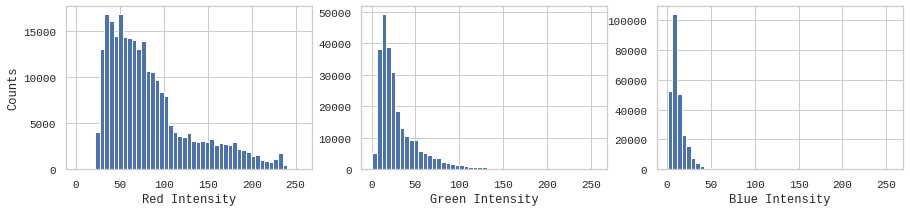

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3)

bin_edges = np.linspace(1,256,50)
for i, cfeature in enumerate(['Red', 'Green', 'Blue']):
  ax[i].hist(Matrix_RGB_Pixels[i, :], bins=bin_edges)
  ax[i].set_xlabel(cfeature + ' Intensity')

ax[0].set_ylabel('Counts')

# Principle Component Analysis

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide7.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide8.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide9.png alt="drawing" width="1000"/>

<img src= https://github.com/MunskyGroup/uqbio2022/raw/master/files/files_statistics/Module_2_2_Ania/Slide10.png alt="drawing" width="1000"/>

__Principle component analysis__ is a common and powerful tool to explore __linear__ correlations in sample data (i.e., experiments).

Principle components can found by calculating the eigenvalues and eigenvectors from the covariance matrix (or by performing singular value decomposition directly on the data).  

When starting with the covariance matrix, $\Sigma$, the eigenvectors of $\Sigma$ (which are always real) describe the important ("principle") directions in the space of observations, and the eigenvalues (which are all real and positive) quantify the average squared uncertainty in those directions.  

If we start with a __zero mean__ sample data set (i.e., a data set that has been been transformed to have zero mean) $\mathbf{X}$ of size $n \times m$, we can compute the sample covariance matrix $\mathbf{S} = \frac{1}{n-1}\mathbf{X^T X}$, a __square__ matrix of dimension $m \times m$. 

To find the PCA decomposition, we compute the eigenvalues and eigenvectors that diagonalize the covariance matrix such that $\mathbf{V^{-1}SV = D}$, where $\mathbf{D}$ is a diagonal matrix of size $m \times m$. The columns of the eigenvector matrix $\mathbf{V}$ should be ordered according to decreasing eigenvalue value. The projection $\mathbf{X \cdot V}$ represents the data projected onto the eigenvector matrix. If some of the eigenvalues are discarded during PCA, then the result is the projection $\mathbf{X \cdot V_0}$, where matrix $\mathbf{V_0}$ is the remaining columns of $\mathbf{V}$.   

It is often computationally efficient to avoid instantiating the covariance matrix $\mathbf{S}$. Instead, we can compute the principal components directly from the data matrix $\mathbf{X}$ using singular value decomposition (SVD).  

For any arbitrary matrix $\mathbf{X}$, we can obtain its SVD decomposition as follows: ($\mathbf{X} = \mathbf{U\Sigma W}^T$). Here, $\mathbf{U,W}$ are orthogonal matrices and $\mathbf{\Sigma}$ is a diagonal matrix. If we compute the covariance matrix $\mathbf{S} = \frac{1}{n-1}\mathbf{X^T X}$, then $\mathbf{S} = \frac{1}{n-1}(\mathbf{W\Sigma U}^T)(\mathbf{U\Sigma W}^T) = \frac{1}{n-1}\mathbf{W\Sigma^2W^T}$. Here, we used the property that $\mathbf{U^T U= I}$ since $\mathbf{U}$ is an orthogonal matrix. 

The matrix $\mathbf{(\Sigma^2)}$ is diagonal. The values on its diagonal are the squares of the eigenvalues of the SVD of the data matrix $\mathbf{X}$. They have the same eigenvectors. Thus, we can run SVD decomposition on the data matrix itself and obtain the eigenvectors and the square root values of the eigenvalues necessary for PCA without computing the covariance matrix explicitly. 

Let's try it on some summary statistics features that we can extract from our single-cell data (see the definition ImageSummaryStatisticsBrian above for the specific features we calculated):

In [ ]:
# Eigenvalue Decomposition on The Covariance Matrix.
cov_features = np.cov(features,rowvar=False,ddof=1)
SquaredStrengths, W = np.linalg.eig(cov_features)

# Set numbers at machine precision to zero
SquaredStrengths = np.real(np.sort(SquaredStrengths)[::-1])
SquaredStrengths[SquaredStrengths<1e-16] = 0.

print(np.sqrt(np.real(SquaredStrengths)))

[8.98584733e+02 2.62251118e+02 4.48244429e+01 3.55500709e+01
 1.48926124e+01 8.40370190e+00 5.81550133e+00 2.54836204e+00
 6.59573791e-01 2.21243968e-01 7.26468859e-02 2.08427934e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


[8.98584733e+02 2.62251118e+02 4.48244429e+01 3.55500709e+01
 1.48926124e+01 8.40370190e+00 5.81550133e+00 2.54836204e+00
 6.59573791e-01 2.21243968e-01 7.26468859e-02 2.08427934e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


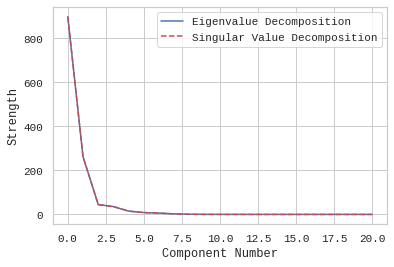

In [ ]:
# Singular Value Decomposition on The Data Matrix.
# First, we need to subtract the mean:
features_mean = np.mean(features,axis=0)
features_zero_mean = np.array([(features[i,:]-features_mean) for i in range(features.shape[0])])

# Then do the singular value decomposition:
Strengths, WT = np.linalg.svd(features_zero_mean)[1:3]  
Strengths[Strengths<1e-8] = 0.

# Finally, divide by the sqrt of the remaining degrees of freedom (N-1):
print(Strengths/np.sqrt(features_zero_mean.shape[0]-1))

fig, ax = plt.subplots(1,1)
ax.plot(Strengths/np.sqrt(features_zero_mean.shape[0]-1))
ax.plot(np.sqrt(SquaredStrengths),'r--')
ax.set_xlabel('Component Number')
ax.set_ylabel('Strength')
ax.legend(['Eigenvalue Decomposition','Singular Value Decomposition'])

[4.71141587e+00 6.67693040e-01 1.31581513e-01 1.16321539e-01
 5.95258443e-02 2.15661661e-02 1.34968685e-02 1.14622999e-02
 3.06950017e-03 7.07789536e-04 2.42827289e-04 7.72213689e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


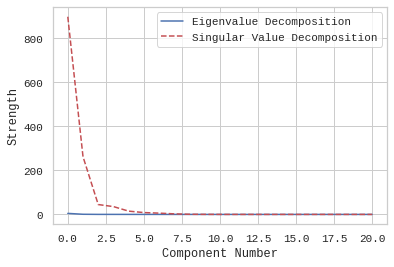

In [ ]:
# Singular Value Decomposition on The Data Matrix.
# First, we need to subtract the mean:
features_mean = np.mean(features,axis=0)
features_cov = np.cov(features)

features_stand = np.array([(features[i,:]-features_mean)/np.sqrt(features_cov[i,i]) for i in range(features.shape[0])])

# Then do the singular value decomposition:
Strengths, WT = np.linalg.svd(features_stand)[1:3]  
Strengths[Strengths<1e-8] = 0.

# Finally, divide by the sqrt of the remaining degrees of freedom (N-1):
print(Strengths/np.sqrt(features_stand.shape[0]-1))

In [ ]:
# Now let's make a plot to visualize the data in Principle Component space
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

Scores = features_stand @ WT.T 

LowRadiusInds = targets<1000.
MidRadiusInds = (targets>1000.) & (targets<2000.)
HighRadiusInds = targets>2000.

print(sum(HighRadiusInds))

def plotPCA(coord1=1,coord2=2):
  fig, ax = plt.subplots(1,1)
  ax.scatter(Scores[LowRadiusInds,coord1], Scores[LowRadiusInds,coord2], color="b")
  ax.scatter(Scores[MidRadiusInds,coord1], Scores[MidRadiusInds,coord2], color="g")
  ax.scatter(Scores[HighRadiusInds,coord1], Scores[HighRadiusInds,coord2], color="r")
  ax.set_xlabel(str(coord1) + 'th Principle Component')
  ax.set_ylabel(str(coord2) + 'th Principle Component')
  ax.legend(['Low Radius','Middle Radius','High Radius'])

w = interactive(plotPCA,coord1=(1,12,1),coord2=(1,12,1));
display(w)

129


interactive(children=(IntSlider(value=1, description='coord1', max=12, min=1), IntSlider(value=2, description=…

# Mathematical interlude: Stochastic process

A stochastic process is any collection of random variables $\{X(t)\}_{t\in T}$ indexed by a set $T$. In the stochastic processes we will work with, $T=[0, \infty)$ is the set of non-negative numbers and the variable $t$ models time. 

In analogue to random vectors, we have the concept of the joint distribution of the process at any collection of time points $t_1, \ldots, t_n$. In particular, we can define the joint cumulative distribution function at times $t_1, \ldots, t_n$ as
$$
F_{X}(x_{t_1}, \ldots, x_{t_n}) 
=
\mathrm{Pr}
\left(
  X(t_1) \leq x_{t_1}, \ldots, X(t_n) \leq x_{t_n}
\right).
$$

We say that a stochastic process $\{X(t)\}$ is __stationary__ if all of the variables $X(t)$ are identicially distributed. This implies its joint CMFs do not change with time shifts. Formally, this means that, for any $n=1,2,\ldots$ and $t_1, \ldots, t_n >0$, and for any fixed time shift $\tau>0$, we have
$$
F_{X}(x_{t_1}, \ldots, x_{t_n}) = F_{X}(x_{t_1+\tau}, \ldots, x_{t_n+\tau}).
$$

We say that a stationary process is __ergodic__ if time average is the same as ensemble average. This means that if you take a very long trajectory from the process and use that to build a histogram, you should have the same distribution as if you have drawn i.i.d. samples from a single variable $X(t)$ at a single point $t$ in time.

# Visualizing and summarizing time series or spatial data

In [ ]:
ts_df = pd.read_csv(data_path.joinpath("repressilator_time_series.csv"))
print(ts_df)

              X           Y           Z           t
0      8.322853    0.000000    0.000000      0.0000
1     59.577244    0.000000   83.251418      1.0001
2     31.026016    0.000000  103.620176      2.0002
3     18.547144   17.845744   91.576306      3.0003
4      8.537294   52.793568   96.205373      4.0004
...         ...         ...         ...         ...
9995  17.270969  184.967727  156.701006   9995.9996
9996   8.222048  187.465980  157.965358   9996.9997
9997  23.586851  194.478104  135.406000   9997.9998
9998  19.377642  248.200508  104.630012   9998.9999
9999  15.057591  220.803077  104.721011  10000.0000

[10000 rows x 4 columns]


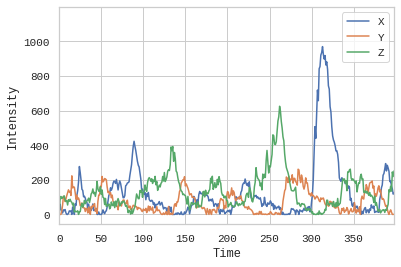

In [ ]:
#@title Repressilator Trajectories { run: "auto", vertical-output: true }
fig, ax = plt.subplots(1,1)

tmin = 0 #@param {type: "slider", min:0, max:10000, default: 0, step: 1}
tmax = 398 #@param {type: "slider", min:0, max:10000, step:1}

tmax = max(tmax, tmin)

ax.plot(ts_df["t"], ts_df["X"], label="X")
ax.plot(ts_df["t"], ts_df["Y"], label="Y")
ax.plot(ts_df["t"], ts_df["Z"], label="Z")
ax.set_xlim([tmin, tmax])
ax.set_xlabel("Time")
ax.set_ylabel("Intensity")
ax.legend()

## Autocorrelation

Let a process $X(t)$ be stationary and ergodic. The autocorrelation of the process for a lag time $\tau$ is defined as the Pearson correlation of $X(t)$ and $X(t+\tau)$ for any time $t>0$:
$$
\mathrm{ACF}(\tau)
=
\rho(X(t), X(t+\tau)).
$$
[We can let $t$ vary arbitrarily, why?]

Essentially, the ACF quantifies how similar the process is to its time-shifted version. If the ACF is close to zero at a lag time $\tau$, observations of the process at time points with time difference $\tau$ will be decorrelated.


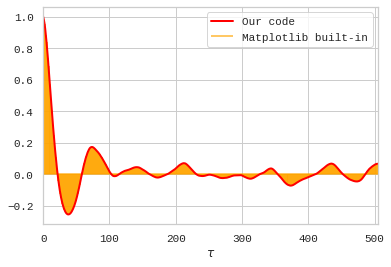

In [ ]:
#@title Adjust slider to zoom in or out { run: "auto", vertical-output: true }
from scipy.signal import correlate

X_norm = ((ts_df["X"]-np.mean(ts_df["X"]))/np.std(ts_df["X"])).to_numpy()
Y_norm = ((ts_df["Y"]-np.mean(ts_df["Y"]))/np.std(ts_df["Y"])).to_numpy()
Z_norm = ((ts_df["Z"]-np.mean(ts_df["Z"]))/np.std(ts_df["Z"])).to_numpy()

maxlags = 505 #@param {type:"slider", min:1, max:9999, step:1}

acfs = np.zeros((maxlags,), dtype=float)
for i in range(maxlags):
  s = X_norm[:-i] if i > 0 else X_norm 
  s1 = X_norm[i:]  
  acfs[i] = np.corrcoef(np.stack((s, s1), axis=0))[0,1]

fig, ax = plt.subplots(1,1)
ax.acorr(X_norm, maxlags=maxlags, normed=True, 
         label="Matplotlib built-in",
         color="orange", alpha=0.8)
ax.plot(acfs, color="red", lw=2, label="Our code")
ax.set_xlim([0, maxlags])
ax.set_xlabel(r"$\tau$")
ax.legend()


#Probability and Statistics - Workbook Completion Requirements:
To obtain credit for this lesson, each student should (i) complete all blanks for questions Q1-Q7 in Workbook Module 2.1.A, (ii) answer a minimum of two questions in the set Q8-17 in Workbook Module 2.1.A, and (iii) answer minimum of two questions from the following.

To obtain a certificate for the course, you must complete a minimum of five notebooks from Modules 1-4 (please note that preliminary notebooks from Module 0 will not be accepted) and submit them together via email before August 15, 2022. Please submit your completed notebooks to qbio_summer_school@colostate.edu

# Notebook Study Questions

Please enter your answers for each of the following questions by adding text or code to fill in the blanks. For the more advanced questions, you may need to do some calculations or create a graph or figure.

__Q1__: Using the image summary statistics make three lists of the pearsons correlation coefficient between each of the three channels (one list for RG, one for BG, and one for RB) and for each of the images. Then, find and show the image with the highest correlation between the red and green channels, and show that image.

In [ ]:
# A1 -- Write your codes here.

__Q2__: Re-do the PCA analysis above, but normalize each features first (i.e., subtract the mean and divide the result by the standard deviation for each feature) before calculating the eigenvalues and eigenvectors or making the PCA plots.  Comment on how this changes the results of your analysis.

In [ ]:
# A2 -- Write your codes here.

__Q3__: Add one or more new features to the ImageSummaryStatistics class that computes summary statistics for images.  Can you find a feature that helps to better differentiate the near and far cells? 

In [ ]:
# A3 -- Copy and edit the class "ImageSummaryStatistics" here.

__Q4__: Load an image, and calculate the histogram for the red and green channel intensity conditioned on the blue channel being between some upper and lower limit.

In [ ]:
# A4 -- Complete the code below
k = 0 # image to load
img = imread(fullFilePaths[k]) # load image [k]

B_low = 40
B_high = 100

# Data = .....  # complete this
# then make a joint scatter plot of the red and green pixel intensities.

# Compare these conditional joint histograms for different thresholds for the blue pixel intensity.


__Q5__: In single-cell analysis, there is often a discussion about intrinsic noise and extrinsic noise.  Intrinsic noise is the random behavior of a gene that is originates in that specific gene. Extrinsic noise is variability that is inherited from some unspecified upstream processes. Consider two genes. How would their scatter plots look if they were mostly controlled by intrinsic noise?  What if they were mostly controlled by the same source of extrinsic noise?  What if they were controlled by two different and unrelated extrinsic noise terms?

__A5__ - Write your answer here.

__Q6__: Consider the simple oscillating ODE:

$$
\begin{aligned}
dx/dt = y \\
dy/dt = -x
\end{aligned}
$$

What is the auto-covariance function (G(tau)) for ‘x’ or ‘y’ versus the time lag tau?  What is the cross-covariance function of ‘x’ and ‘y’ versus the time lag tau? 

How would this change if we added some random noise (eta is gaussian white noise) to the system:

dx/dt = y
dy/dt = -x + eta

(you don’t need to solve this, just describe what effect there would be on the correlations versus time lag)


__A6__ - Write your answer here.